## DASC 550 Project2: House Price Prediction
### [[Hamza]] [[Dehidi]]
### 0077989

#### Submission Deadline: August 22, 2022 11:59 PM

In this project, you are going to build an end-to-end machine learning solution using a convolutional neural network for house price prediction problem. You should use `tensorflow` library to build your neural network.

The data set is provided in a file called `HD.zip`, which contains 4 images per house and `HousesInfo.txt`. You will predict the price  of each house (given in the last column of `HousesInfo.txt`) using the images provided.

While building your regression model, you should use the randomly selected 80\% as training set and the remaining 20\% as test set. You should report the predictive performances on learning, validation and test sets.

You should also report the metrics you choose to measure the performance of the solution you developed and the reasoning behind your choices.

In [2]:
def load_house_images(data_path, house_count, image_size):
    house_images = np.zeros((house_count, 2 * image_size[0], 2 * image_size[1], 3),
                             dtype = "uint8")
    for i in range(house_count):
        bathroom = image.load_img("./{}/{}_bathroom.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, 0:image_size[0], 0:image_size[1], :] = bathroom
        bedroom = image.load_img("./{}/{}_bedroom.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, 0:image_size[0], image_size[1]:(2 * image_size[1]), :] = bedroom
        frontal = image.load_img("./{}/{}_frontal.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), 0:image_size[1], :] = frontal
        kitchen = image.load_img("./{}/{}_kitchen.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), image_size[1]:(2 * image_size[1]), :] = kitchen
    return house_images

def load_house_prices(data_path):
    houses_info = np.loadtxt("./{}/HousesInfo.txt".format(data_path))
    return houses_info[:, 4]

In [6]:
# downloading the file to colab
!gdown https://drive.google.com/uc?id=1xOi9k-ca3KmE7j_KmB5a4MtDZao2LBPO

Downloading...
From: https://drive.google.com/uc?id=1xOi9k-ca3KmE7j_KmB5a4MtDZao2LBPO
To: /content/project2_data.npz
100% 83.7M/83.7M [00:03<00:00, 23.5MB/s]


In [2]:
loaded = np.load('project2_data.npz') # this is the output of load_house_images & load_house_prices functions, to save time.
house_images = loaded['a']
house_prices = loaded['b']

In [3]:
#house_images = load_house_images("HD", 535, (128, 128))
print(house_images.shape)

(535, 256, 256, 3)


In [9]:
#house_prices = load_house_prices("HD")
print(house_prices.shape)

(535,)


First house's price:  869500.0


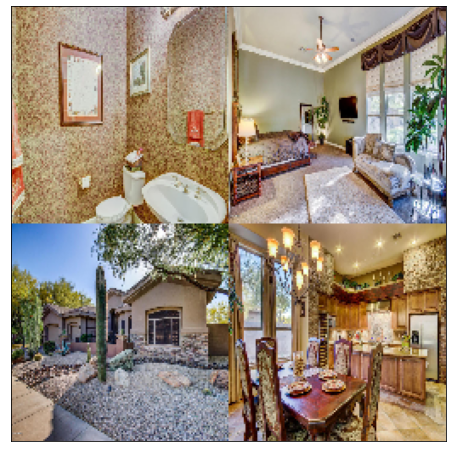

In [10]:
#display the first house's price 
print("First house's price: ", house_prices[0])

#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(house_images[0, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
# Splitting the data to Train, Validation & Test
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(house_images, house_prices,
                                                test_size = 0.20,
                                                random_state = 1234)
# Scaling the pixles between 0-1
Xtrain = Xtrain / 255.0 
Xtest = Xtest / 255.0

Xlearn, Xval, ylearn, yval = train_test_split(Xtrain, ytrain,
                                              test_size = 0.20,
                                              random_state = 1234)

In [20]:
print("Xlearn.shape:", Xlearn.shape, "--- ylearn.shape:", ylearn.shape)
print("Xval.shape:  ", Xval.shape,   " --- yval.shape:  ", yval.shape)
print("Xtest.shape: ", Xtest.shape,  "--- ytest.shape: ", ytest.shape)

Xlearn.shape: (342, 256, 256, 3) --- ylearn.shape: (342,)
Xval.shape:   (86, 256, 256, 3)  --- yval.shape:   (86,)
Xtest.shape:  (107, 256, 256, 3) --- ytest.shape:  (107,)


According to the papers I've read on the subject, the error rate in these problems is around 7.5%, with the exception that they also take into account text features, so in order to have a benchmark for my model, I'll assume that a 15% error rate is acceptable when working with a small dataset and only using visual features.

**papers:**
 
*   Vision-based housing price estimation using interior, exterior & satellite images.
*   House price estimation from visual and textual features.
*   Vision-based Real Estate Price Estimation






In [79]:
Target_error= ytrain.mean()*0.15
print("Target Error:", Target_error)

Target Error: 86320.40467289719


## Models from scratch

**For the first model,
I will create two blocks, 1 Conv in each block.
first Conv will have 32 filters and the second 64.**

In [22]:
inputs = keras.Input(shape=(Xlearn.shape[1], 
                            Xlearn.shape[2],
                            Xlearn.shape[3]))
# 1st block
x = layers.Conv2D(32, kernel_size= 3 ,padding = "same", activation= "relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size= 2)(x)

# 2nd block
x = layers.Conv2D(64, kernel_size= 3,padding = "same", activation= "relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size= 2)(x)

# Output layers
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
simple_model = keras.Model(inputs=inputs, outputs=outputs)


# Model compiling
simple_model.compile(loss="mse",
                     optimizer="adam",
                     metrics=["mae"])

simple_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256   

In [4]:
# Defining the early stop
early_stop = [keras.callbacks.EarlyStopping(monitor = "val_loss",
                                            patience = 5,
                                            restore_best_weights = True)]

In [24]:
# Fitting the model      
simple_model_history = simple_model.fit(Xlearn, ylearn,
                                        epochs= 20,
                                        validation_data= (Xval, yval),
                                        callbacks= early_stop)

Epoch 1/20
11/11 [==============================] - 15s 239ms/step - loss: 550013632512.0000 - mae: 567968.0625 - val_loss: 499968704512.0000 - val_mae: 602445.0625
Epoch 2/20
11/11 [==============================] - 1s 90ms/step - loss: 547363160064.0000 - mae: 565814.4375 - val_loss: 499885441024.0000 - val_mae: 602377.9375
Epoch 3/20
11/11 [==============================] - 1s 81ms/step - loss: 543967870976.0000 - mae: 563001.5625 - val_loss: 499398508544.0000 - val_mae: 601975.9375
Epoch 4/20
11/11 [==============================] - 1s 78ms/step - loss: 539845918720.0000 - mae: 559618.5625 - val_loss: 498407374848.0000 - val_mae: 601156.1875
Epoch 5/20
11/11 [==============================] - 1s 78ms/step - loss: 535495802880.0000 - mae: 555744.3750 - val_loss: 497049665536.0000 - val_mae: 600029.1250
Epoch 6/20
11/11 [==============================] - 1s 78ms/step - loss: 530518867968.0000 - mae: 551625.1875 - val_loss: 495679143936.0000 - val_mae: 598893.3750
Epoch 7/20
11/11 [==

In [5]:
def plot_history(history):
  fig, axs = plt.subplots(1, 2, figsize = (14, 5))
  ax = axs.ravel()

  history_ = history.history
  loss = history_["loss"]
  val_loss = history_["val_loss"]

  mae = history_["mae"]
  val_mae = history_["val_mae"]
  
  epochs = range(1, len(loss) + 1)

  for i, x in enumerate (ax):
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    if i ==0:    
      sns.lineplot(x=epochs, y= loss, label="Training loss", ax= x)
      sns.lineplot(x=epochs, y= val_loss, label="Validation loss", ax= x)
      # Format Title
      x.set_title("Training and validation loss", weight='bold', fontsize=14)
      # Format ylabel
      x.set(ylabel="Loss")

    elif i==1:
      sns.lineplot(x=epochs, y= mae, label="Training MAE", ax= x)
      sns.lineplot(x=epochs, y= val_mae, label="Validation MAE", ax= x)
      # Format Title
      x.set_title("Training and validation MAE", weight='bold', fontsize=14)
      # Format ylabel
      x.set(ylabel="MAE")

    # Format xlabel
    x.set(xlabel="Epochs")
    x.legend()


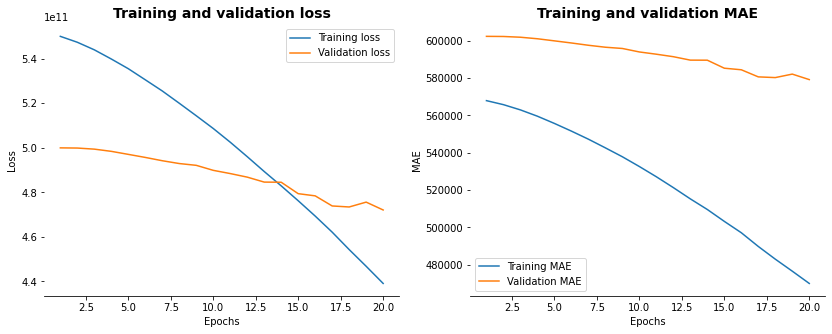

In [32]:
plot_history(simple_model_history)

**The training loss didn't much decrease after 20 epochs, and the MAE on the training is very high.**

**I will add additional layers.**

In [33]:
# input & rescaling layers layers wont be changed.
inputs = keras.Input(shape=(Xlearn.shape[1], 
                            Xlearn.shape[2],
                            Xlearn.shape[3]))

# 1st block
x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(inputs)
x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# 2nd block
x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation="relu")(x)
x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation= "relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Output layers
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
model_2 = keras.Model(inputs=inputs, outputs=outputs)


# Model compiling
model_2.compile(loss="mse", optimizer="adam", metrics=["mae"])

# Fitting the model      
model_2_history = model_2.fit(Xlearn, ylearn,
                      epochs= 20,
                      validation_data= (Xval, yval),
                      callbacks= early_stop)

Epoch 1/20
11/11 [==============================] - 6s 441ms/step - loss: 549836292096.0000 - mae: 567827.0625 - val_loss: 499992592384.0000 - val_mae: 602464.0000
Epoch 2/20
11/11 [==============================] - 2s 156ms/step - loss: 546491531264.0000 - mae: 565069.0625 - val_loss: 499749748736.0000 - val_mae: 602263.2500
Epoch 3/20
11/11 [==============================] - 2s 157ms/step - loss: 542146953216.0000 - mae: 561430.0625 - val_loss: 499127255040.0000 - val_mae: 601750.0625
Epoch 4/20
11/11 [==============================] - 2s 157ms/step - loss: 537227853824.0000 - mae: 557101.0625 - val_loss: 498065801216.0000 - val_mae: 600873.8125
Epoch 5/20
11/11 [==============================] - 2s 159ms/step - loss: 531665715200.0000 - mae: 552271.3125 - val_loss: 496178069504.0000 - val_mae: 599314.4375
Epoch 6/20
11/11 [==============================] - 2s 157ms/step - loss: 525752827904.0000 - mae: 547292.0000 - val_loss: 493947715584.0000 - val_mae: 597461.5625
Epoch 7/20
11/11

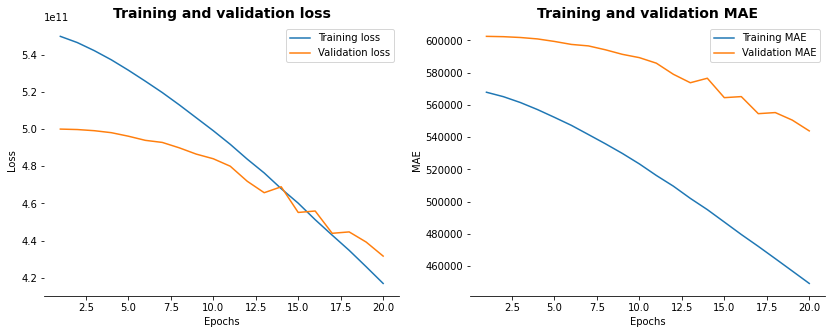

In [34]:
plot_history(model_2_history)

**This model appears to be superior to the prior one because the training loss decreased significantly across the same epochs.Additionally, it performed better on the validation set.**

**However, the model learns quite slowly, therefore I'll try to tune the learning rate**

In [66]:
learning_rates = [0.0001, 0.001, 0.002, 0.01, 0.1]
histories = {}
for learning_rate in learning_rates:
    
  # input & rescaling layers layers wont be changed.
  inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))

  # 1st block
  x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(inputs)
  x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # 2nd block
  x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation="relu")(x)
  x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation= "relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # Output layers
  x = layers.Flatten()(x)
  outputs = layers.Dense(1)(x)
  model_3 = keras.Model(inputs=inputs, outputs=outputs)


  # Model compiling
  model_3.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

  # Fitting the model      
  histories[f"{learning_rate}"] = model_3.fit(Xlearn, ylearn,
                        epochs= 20,
                        verbose = 0,
                        validation_data= (Xval, yval),
                        callbacks= early_stop)

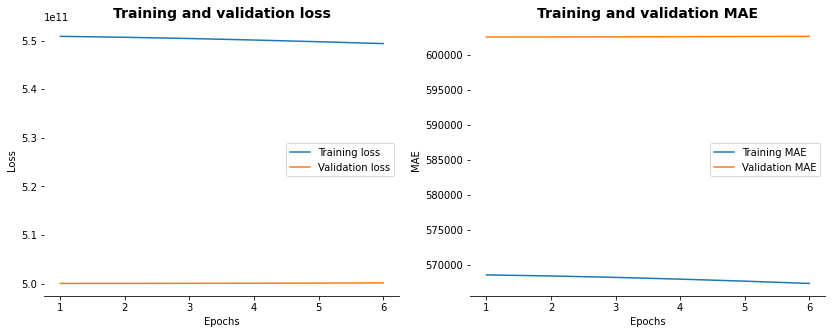

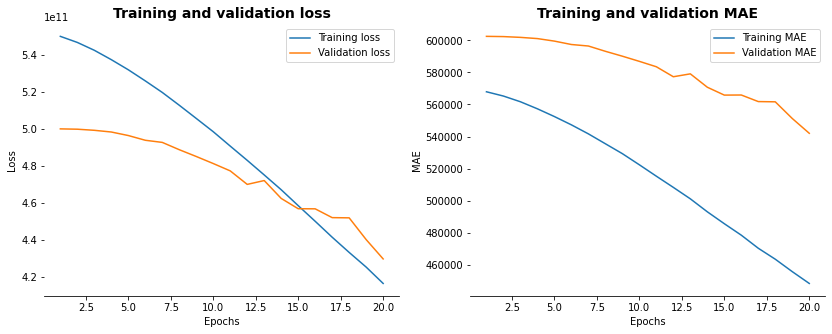

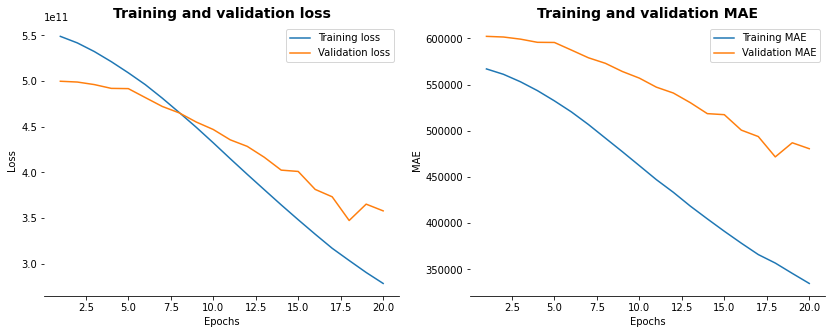

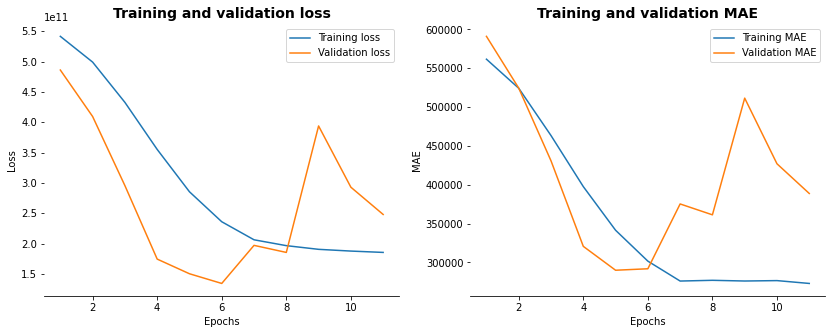

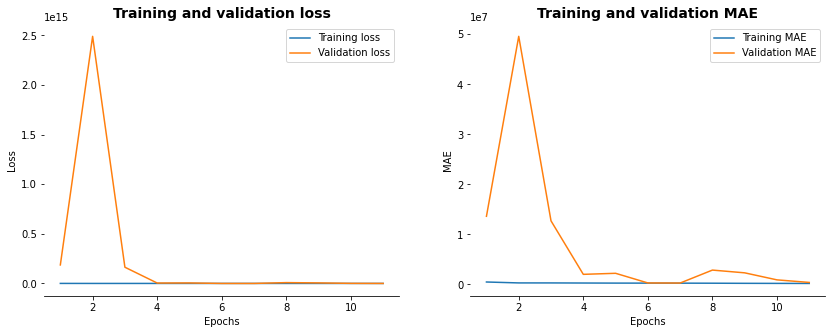

In [69]:
for history in histories.values():
  plot_history(history)

In [70]:
# 0.002 learning rate was the best between the others

In [78]:
learning_rates = [0.001,0.002,0.003,0.004,0.005]
histories = {}
for learning_rate in learning_rates:
    
  # input & rescaling layers layers wont be changed.
  inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))

  # 1st block
  x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(inputs)
  x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # 2nd block
  x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation="relu")(x)
  x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation= "relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # Output layers
  x = layers.Flatten()(x)
  outputs = layers.Dense(1)(x)
  model_3 = keras.Model(inputs=inputs, outputs=outputs)


  # Model compiling
  model_3.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

  # Fitting the model      
  histories[f"{learning_rate}"] = model_3.fit(Xlearn, ylearn,
                        epochs= 20,
                        verbose = 0,
                        validation_data= (Xval, yval),
                        callbacks= early_stop)

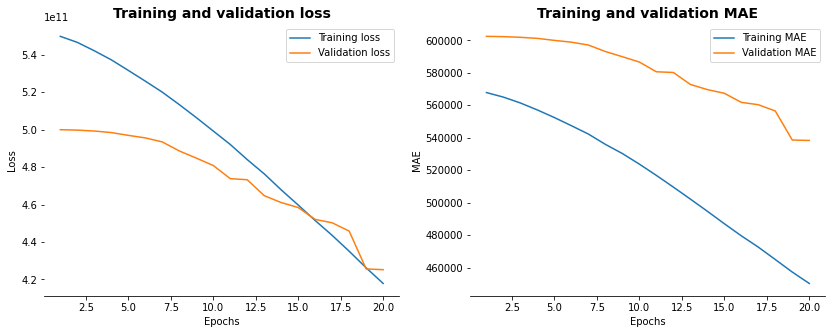

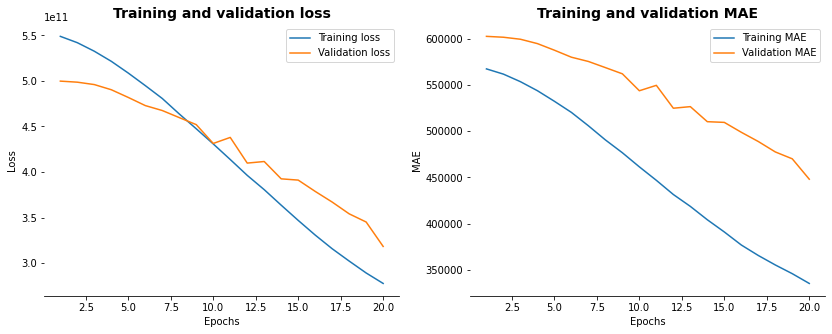

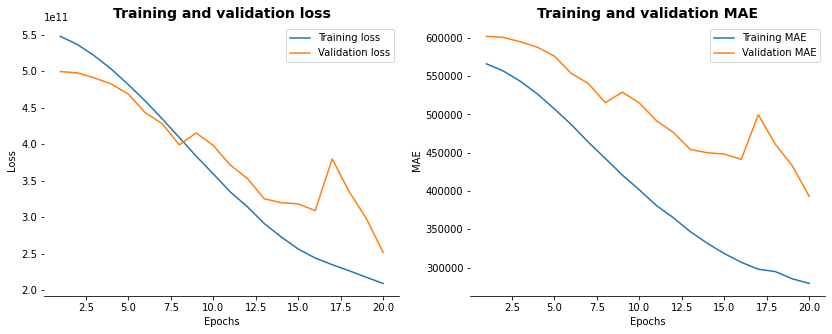

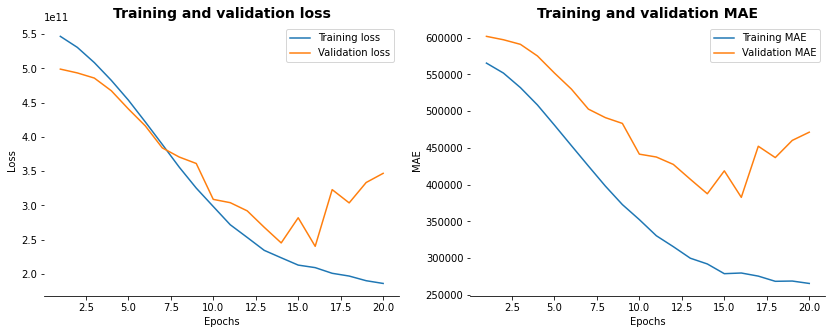

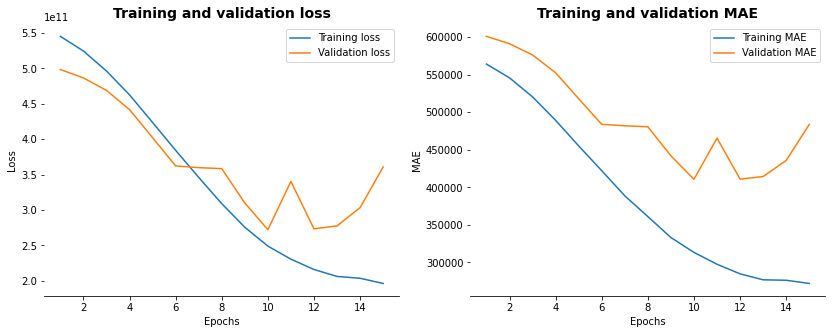

In [79]:
for history in histories.values():
  plot_history(history)

In [12]:
learning_rates = [0.002,0.0022,0.0024,0.0026,0.0028, 0.003]
histories = {}
for learning_rate in learning_rates:
    
  # input & rescaling layers layers wont be changed.
  inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))

  # 1st block
  x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(inputs)
  x = layers.Conv2D(32, kernel_size= 3, padding = "same", activation="relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # 2nd block
  x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation="relu")(x)
  x = layers.Conv2D(64, kernel_size= 3, padding = "same", activation= "relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # Output layers
  x = layers.Flatten()(x)
  outputs = layers.Dense(1)(x)
  model_3 = keras.Model(inputs=inputs, outputs=outputs)


  # Model compiling
  model_3.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

  # Fitting the model      
  histories[f"{learning_rate}"] = model_3.fit(Xlearn, ylearn,
                        epochs= 20,
                        verbose = 0,
                        validation_data= (Xval, yval),
                        callbacks= early_stop)

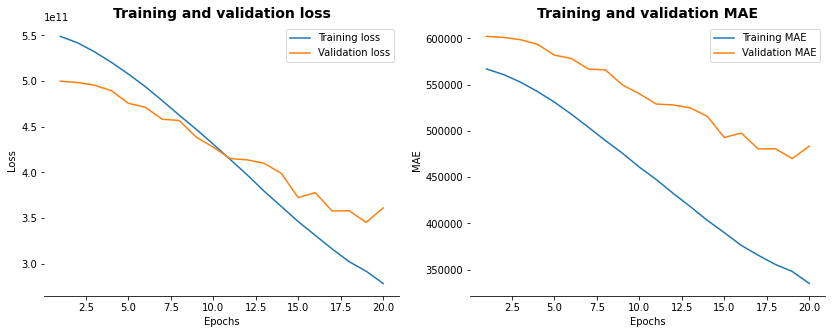

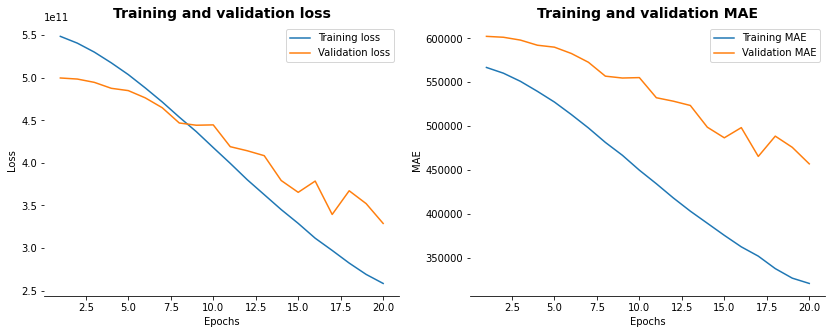

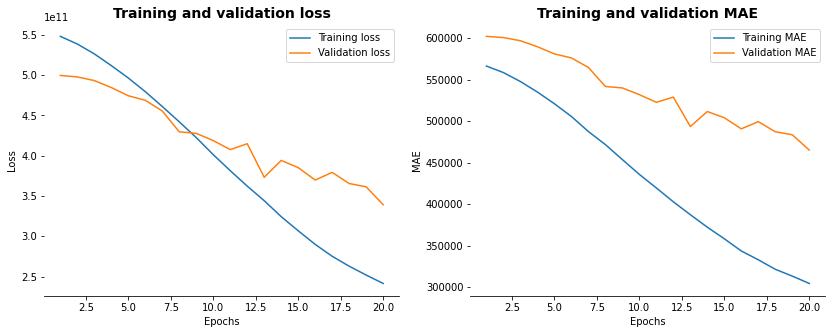

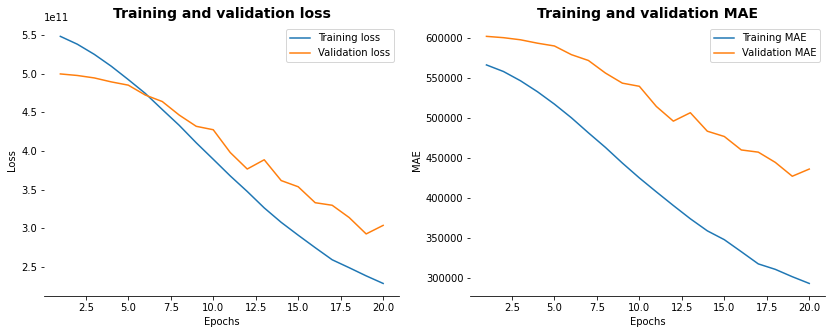

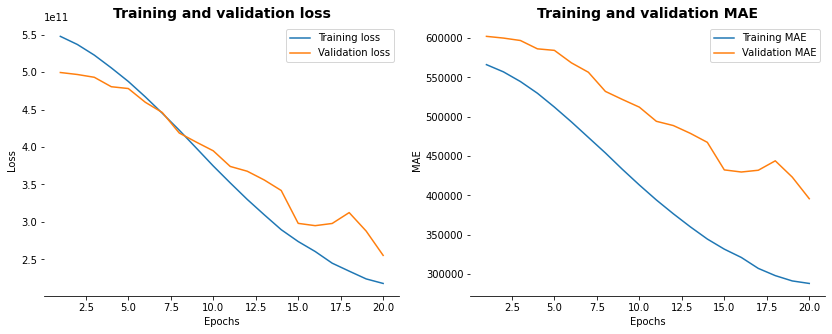

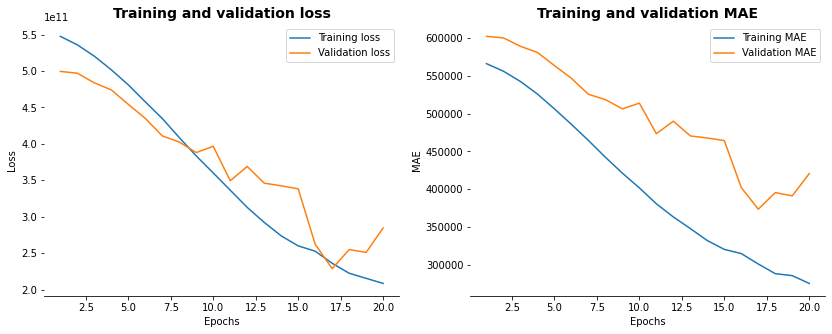

In [13]:
for history in histories.values():
  plot_history(history)

**I will use 0.0028 as the learning rate it gave the best results, I will add regulization to the model.**

In [7]:
learning_rate = 0.0028

In [99]:
def dropout_func(padding = "same"):
  inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))

  # 1st block
  x = layers.Conv2D(32, kernel_size= 3, padding = padding, activation="relu")(inputs)
  x = layers.Conv2D(32, kernel_size= 3, padding = padding, activation="relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)

  # 2nd block
  x = layers.Conv2D(64, kernel_size= 3, padding = padding, activation="relu")(x)
  x = layers.Conv2D(64, kernel_size= 3, padding = padding, activation= "relu")(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.5)(x)
  x = layers.MaxPooling2D(pool_size=2)(x)


  # Output layers
  x = layers.Flatten()(x)
  outputs = layers.Dense(1)(x)
  model = keras.Model(inputs=inputs, outputs=outputs)


  # Model compiling
  model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

  return model

# Fitting the model
dropout_model = dropout_func()
dropout_model_history = dropout_model.fit(Xlearn, ylearn,
                                          epochs= 40,
                                          validation_data= (Xval, yval),
                                          callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 3s 191ms/step - loss: 546857713664.0000 - mae: 565043.8750 - val_loss: 499391004672.0000 - val_mae: 601970.5000
Epoch 2/40
11/11 [==============================] - 2s 166ms/step - loss: 534182789120.0000 - mae: 554569.8750 - val_loss: 498177376256.0000 - val_mae: 600983.0000
Epoch 3/40
11/11 [==============================] - 2s 167ms/step - loss: 517945622528.0000 - mae: 541110.3750 - val_loss: 492330909696.0000 - val_mae: 596217.5625
Epoch 4/40
11/11 [==============================] - 2s 167ms/step - loss: 500101939200.0000 - mae: 525696.0625 - val_loss: 469060812800.0000 - val_mae: 576323.4375
Epoch 5/40
11/11 [==============================] - 2s 167ms/step - loss: 480299319296.0000 - mae: 507466.0938 - val_loss: 442160021504.0000 - val_mae: 552837.2500
Epoch 6/40
11/11 [==============================] - 2s 167ms/step - loss: 458441261056.0000 - mae: 487437.4375 - val_loss: 411342602240.0000 - val_mae: 525885.1875
Epoch 7/40
11/11

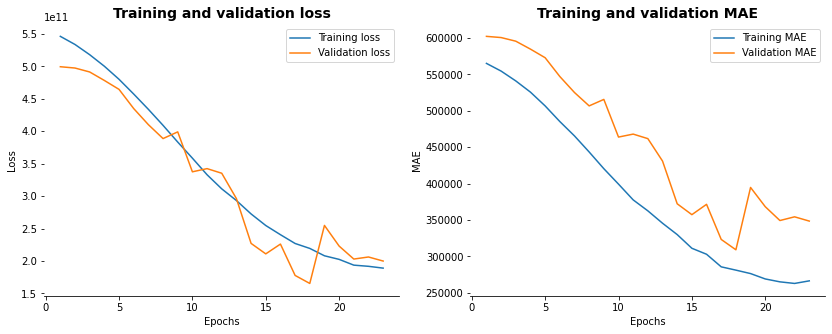

In [96]:
plot_history(dropout_model_history)

**Fitting the model without padding**

In [100]:
# Fitting the model
dropout_model = dropout_func(padding = "valid")
dropout_model_history = dropout_model.fit(Xlearn, ylearn,
                                          epochs= 40,
                                          validation_data= (Xval, yval),
                                          callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 3s 185ms/step - loss: 546767667200.0000 - mae: 565240.8125 - val_loss: 499233357824.0000 - val_mae: 601841.5625
Epoch 2/40
11/11 [==============================] - 2s 166ms/step - loss: 535107141632.0000 - mae: 555518.7500 - val_loss: 497517625344.0000 - val_mae: 600428.0000
Epoch 3/40
11/11 [==============================] - 2s 166ms/step - loss: 520066924544.0000 - mae: 542482.7500 - val_loss: 487182172160.0000 - val_mae: 591853.5625
Epoch 4/40
11/11 [==============================] - 2s 167ms/step - loss: 503219781632.0000 - mae: 527537.2500 - val_loss: 468410204160.0000 - val_mae: 575946.6250
Epoch 5/40
11/11 [==============================] - 2s 167ms/step - loss: 484294754304.0000 - mae: 510596.1562 - val_loss: 459987451904.0000 - val_mae: 568662.0625
Epoch 6/40
11/11 [==============================] - 2s 167ms/step - loss: 464023715840.0000 - mae: 491358.1875 - val_loss: 436943486976.0000 - val_mae: 548362.0625
Epoch 7/40
11/11

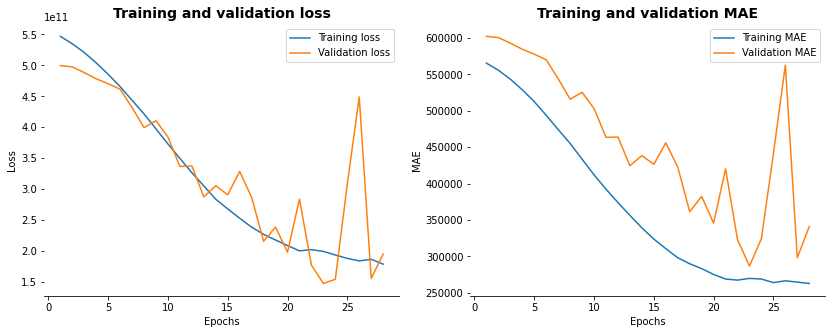

In [94]:
plot_history(dropout_model_history)

**New Approach**

In [43]:
inputs = keras.Input(shape=(Xlearn.shape[1], 
                            Xlearn.shape[2],
                            Xlearn.shape[3]))

# 1st block
x = layers.Conv2D(8, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x) # strides: If None, it will default to pool_size.

# 2nd block
x = layers.Conv2D(16, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# 3nd block
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Output Layers
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
model_4 = keras.Model(inputs=inputs, outputs=outputs)

# Model compiling
model_4.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

# Fitting the model 
model_4_history = model_4.fit(Xlearn, ylearn,
                              epochs= 40,
                              validation_data= (Xval, yval),
                              callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 3s 154ms/step - loss: 548127899648.0000 - mae: 566305.1875 - val_loss: 469780004864.0000 - val_mae: 576726.5625
Epoch 2/40
11/11 [==============================] - 1s 68ms/step - loss: 384684359680.0000 - mae: 435704.9688 - val_loss: 168123383808.0000 - val_mae: 308204.9688
Epoch 3/40
11/11 [==============================] - 1s 67ms/step - loss: 251085930496.0000 - mae: 319059.8750 - val_loss: 176463347712.0000 - val_mae: 340407.5312
Epoch 4/40
11/11 [==============================] - 1s 68ms/step - loss: 250648051712.0000 - mae: 343218.0000 - val_loss: 154112720896.0000 - val_mae: 293799.8750
Epoch 5/40
11/11 [==============================] - 1s 66ms/step - loss: 235151376384.0000 - mae: 320838.6875 - val_loss: 151868293120.0000 - val_mae: 291322.5625
Epoch 6/40
11/11 [==============================] - 1s 68ms/step - loss: 232969748480.0000 - mae: 318850.5938 - val_loss: 160880738304.0000 - val_mae: 300739.5938
Epoch 7/40
11/11 [===

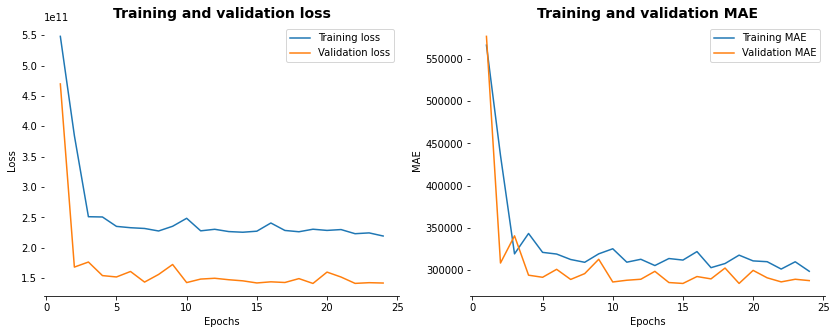

In [44]:
plot_history(model_4_history)

**This strategy was far more successful than the earlier ones.**

In [55]:
model_4.evaluate(Xlearn, ylearn)
model_4.evaluate(Xval, yval)
model_4.evaluate(Xtest, ytest)

4/4 [==============================] - 0s 31ms/step - loss: 452805754880.0000 - mae: 380296.5312


[452805754880.0, 380296.53125]

# Data Augmentation

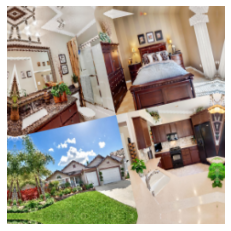

In [50]:
data_augmentation = keras.Sequential([layers.RandomRotation(0.05),
                                      layers.RandomZoom(0.2)])

augmented_images = data_augmentation(Xlearn*255, training=True)
plt.imshow(augmented_images[0].numpy().astype("uint8"))
plt.axis("off");

In [52]:
inputs = keras.Input(shape=(Xlearn.shape[1], 
                            Xlearn.shape[2],
                            Xlearn.shape[3]))
x = data_augmentation(inputs)

# 1st block
x = layers.Conv2D(8, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(8, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# 2nd block
x = layers.Conv2D(16, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# 3nd block
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# flatten, dense and output
x = layers.Flatten()(x)
outputs = layers.Dense(1)(x)
model_5 = keras.Model(inputs=inputs, outputs=outputs)

# Model compiling
model_5.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

# Fitting the model 
model_5_history = model_5.fit(Xlearn, ylearn,
                              epochs= 40,
                              validation_data= (Xval, yval),
                              callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 2s 87ms/step - loss: 548573511680.0000 - mae: 566559.1875 - val_loss: 471420698624.0000 - val_mae: 578380.6250
Epoch 2/40
11/11 [==============================] - 1s 63ms/step - loss: 361432645632.0000 - mae: 424077.9062 - val_loss: 145664278528.0000 - val_mae: 284653.7812
Epoch 3/40
11/11 [==============================] - 1s 62ms/step - loss: 235670257664.0000 - mae: 318428.7188 - val_loss: 147993821184.0000 - val_mae: 303206.6875
Epoch 4/40
11/11 [==============================] - 1s 71ms/step - loss: 233863249920.0000 - mae: 312158.6562 - val_loss: 141614874624.0000 - val_mae: 281147.4062
Epoch 5/40
11/11 [==============================] - 1s 63ms/step - loss: 230744457216.0000 - mae: 316146.0625 - val_loss: 142381154304.0000 - val_mae: 281763.1562
Epoch 6/40
11/11 [==============================] - 1s 63ms/step - loss: 227661725696.0000 - mae: 314629.4375 - val_loss: 145136992256.0000 - val_mae: 284202.9062
Epoch 7/40
11/11 [====

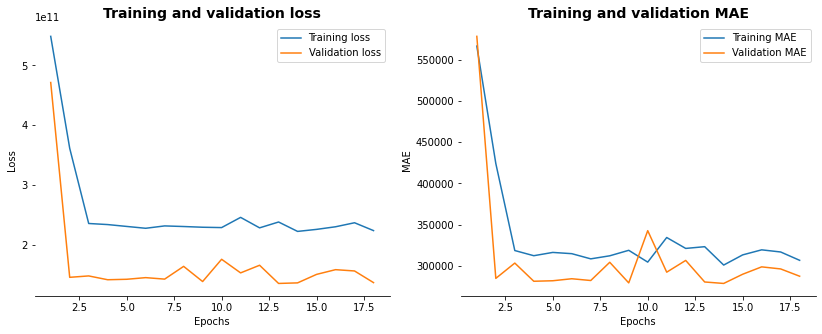

In [53]:
plot_history(model_5_history)

In [54]:
model_5.evaluate(Xlearn, ylearn)
model_5.evaluate(Xval, yval)
model_5.evaluate(Xtest, ytest)

4/4 [==============================] - 0s 80ms/step - loss: 457088794624.0000 - mae: 382393.2188


[457088794624.0, 382393.21875]

**After the data augmentation was implemented, there was no discernible improvement.**

# Pre-trained Models

In [15]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet",
                                           include_top=False)
conv_base.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [80]:
inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
outputs = layers.Dense(1)(x)
VGG_model = keras.Model(inputs, outputs)

# Model compiling
VGG_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

# Fitting the model
VGG_model_history = VGG_model.fit(Xlearn, ylearn,
                                          epochs= 40,
                                          validation_data= (Xval, yval),
                                          callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 4s 299ms/step - loss: 547753918464.0000 - mae: 565969.0000 - val_loss: 491001282560.0000 - val_mae: 594953.3750
Epoch 2/40
11/11 [==============================] - 3s 263ms/step - loss: 535156686848.0000 - mae: 554631.1250 - val_loss: 471419486208.0000 - val_mae: 578260.4375
Epoch 3/40
11/11 [==============================] - 3s 264ms/step - loss: 511603408896.0000 - mae: 532871.1875 - val_loss: 439218634752.0000 - val_mae: 549940.3750
Epoch 4/40
11/11 [==============================] - 3s 265ms/step - loss: 476497018880.0000 - mae: 499317.0625 - val_loss: 394190028800.0000 - val_mae: 511100.8438
Epoch 5/40
11/11 [==============================] - 3s 266ms/step - loss: 429992476672.0000 - mae: 458734.4062 - val_loss: 339537199104.0000 - val_mae: 465936.1875
Epoch 6/40
11/11 [==============================] - 3s 267ms/step - loss: 378678181888.0000 - mae: 414940.5000 - val_loss: 280663621632.0000 - val_mae: 418641.6250
Epoch 7/40
11/11

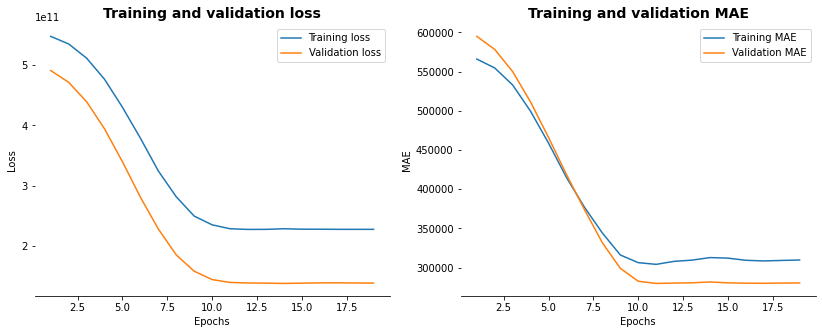

In [81]:
plot_history(VGG_model_history)

In [57]:
VGG_model.evaluate(Xlearn, ylearn)
VGG_model.evaluate(Xval, yval)
VGG_model.evaluate(Xtest, ytest)

4/4 [==============================] - 2s 590ms/step - loss: 457042264064.0000 - mae: 378832.7500


[457042264064.0, 378832.75]

In [20]:
conv_base2 = keras.applications.Xception(weights="imagenet",
                                         include_top=False)
conv_base2.trainable = False

83697664/83683744 [==============================] - 0s 0us/step


In [59]:
inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))
x = keras.applications.xception.preprocess_input(inputs)
x = conv_base2(x)
x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
outputs = layers.Dense(1)(x)
Xcep_model = keras.Model(inputs, outputs)

# Model compiling
Xcep_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

# Fitting the model
Xcep_model_history = Xcep_model.fit(Xlearn, ylearn,
                                          epochs= 40,
                                          validation_data= (Xval, yval),
                                          callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 8s 414ms/step - loss: 547710763008.0000 - mae: 565881.5000 - val_loss: 490707615744.0000 - val_mae: 594708.2500
Epoch 2/40
11/11 [==============================] - 3s 286ms/step - loss: 534514728960.0000 - mae: 554272.4375 - val_loss: 470704783360.0000 - val_mae: 577647.6250
Epoch 3/40
11/11 [==============================] - 3s 285ms/step - loss: 510586322944.0000 - mae: 532142.1250 - val_loss: 437837201408.0000 - val_mae: 548695.6875
Epoch 4/40
11/11 [==============================] - 3s 289ms/step - loss: 474724663296.0000 - mae: 497578.6250 - val_loss: 392344764416.0000 - val_mae: 509413.5000
Epoch 5/40
11/11 [==============================] - 3s 293ms/step - loss: 427285807104.0000 - mae: 455952.7500 - val_loss: 337706778624.0000 - val_mae: 464452.2812
Epoch 6/40
11/11 [==============================] - 3s 290ms/step - loss: 374855892992.0000 - mae: 413576.7812 - val_loss: 278510698496.0000 - val_mae: 416865.5312
Epoch 7/40
11/11

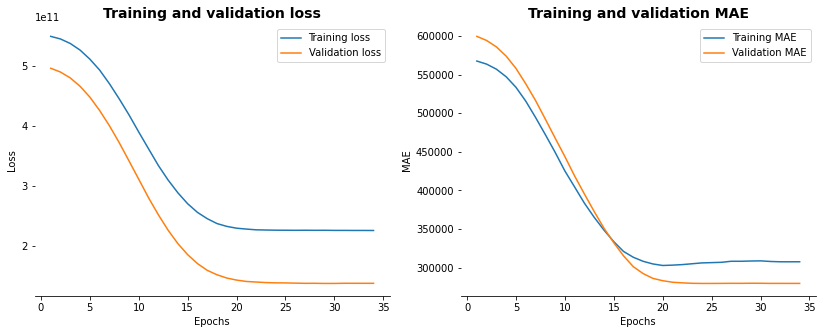

In [23]:
plot_history(Xcep_model_history)

In [62]:
Xcep_model.evaluate(Xlearn, ylearn)
Xcep_model.evaluate(Xval, yval)
Xcep_model.evaluate(Xtest, ytest)

4/4 [==============================] - 1s 353ms/step - loss: 454790840320.0000 - mae: 379106.9688


[454790840320.0, 379106.96875]

In [37]:
conv_base3 = keras.applications.InceptionV3(weights="imagenet",
                                            include_top=False)
conv_base3.trainable = False


inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))
x = keras.applications.inception_v3.preprocess_input(inputs)
x = conv_base3(x)
x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
outputs = layers.Dense(1)(x)
incep_model = keras.Model(inputs, outputs)

# Model compiling
incep_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

# Fitting the model
incep_model_history = incep_model.fit(Xlearn, ylearn,
                                          epochs= 40,
                                          validation_data= (Xval, yval),
                                          callbacks= early_stop)

Epoch 1/40
11/11 [==============================] - 15s 715ms/step - loss: 544070139904.0000 - mae: 562108.5625 - val_loss: 478266392576.0000 - val_mae: 584041.9375
Epoch 2/40
11/11 [==============================] - 2s 174ms/step - loss: 513661239296.0000 - mae: 534569.0000 - val_loss: 432478388224.0000 - val_mae: 543590.4375
Epoch 3/40
11/11 [==============================] - 2s 170ms/step - loss: 460904398848.0000 - mae: 484574.3125 - val_loss: 362078175232.0000 - val_mae: 484553.2500
Epoch 4/40
11/11 [==============================] - 2s 182ms/step - loss: 385722810368.0000 - mae: 425296.2812 - val_loss: 278919086080.0000 - val_mae: 418393.6875
Epoch 5/40
11/11 [==============================] - 2s 175ms/step - loss: 311745183744.0000 - mae: 366477.3750 - val_loss: 202301882368.0000 - val_mae: 350413.5938
Epoch 6/40
11/11 [==============================] - 2s 181ms/step - loss: 253460611072.0000 - mae: 321567.9062 - val_loss: 156653043712.0000 - val_mae: 297955.3438
Epoch 7/40
11/1

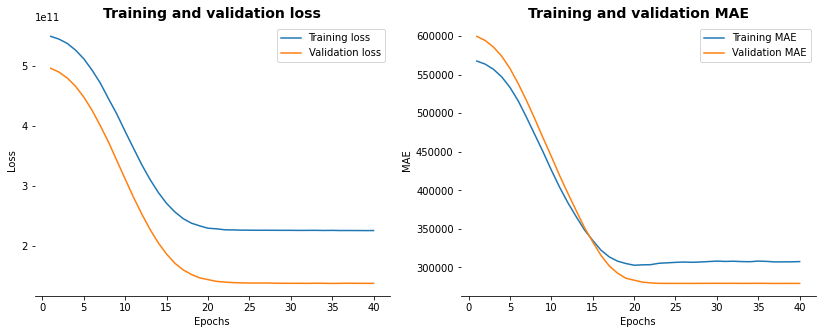

In [32]:
plot_history(incep_model_history)

In [60]:
incep_model.evaluate(Xlearn, ylearn)
incep_model.evaluate(Xval, yval)
incep_model.evaluate(Xtest, ytest)

4/4 [==============================] - 1s 402ms/step - loss: 442203504640.0000 - mae: 362201.5625


[442203504640.0, 362201.5625]

In [40]:
conv_base4 = keras.applications.resnet50.ResNet50(weights="imagenet",
                                            include_top=False)
conv_base4.trainable = False


inputs = keras.Input(shape=(Xlearn.shape[1], 
                              Xlearn.shape[2],
                              Xlearn.shape[3]))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base4(x)
x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
outputs = layers.Dense(1)(x)
resnet_model = keras.Model(inputs, outputs)

# Model compiling
resnet_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])

# Fitting the model
resnet_model_history = resnet_model.fit(Xlearn, ylearn,
                                          epochs= 40,
                                          validation_data= (Xval, yval),
                                          callbacks= early_stop)

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/40
11/11 [==============================] - 10s 491ms/step - loss: 537495896064.0000 - mae: 557297.3125 - val_loss: 462647033856.0000 - val_mae: 570675.5625
Epoch 2/40
11/11 [==============================] - 2s 227ms/step - loss: 488441380864.0000 - mae: 510228.7812 - val_loss: 387408199680.0000 - val_mae: 505296.3750
Epoch 3/40
11/11 [==============================] - 3s 237ms/step - loss: 404791558144.0000 - mae: 438395.8438 - val_loss: 284378365952.0000 - val_mae: 421623.7188
Epoch 4/40
11/11 [==============================] - 2s 228ms/step - loss: 308248903680.0000 - mae: 365359.0312 - val_loss: 188204122112.0000 - val_mae: 335030.6875
Epoch 5/40
11/11 [==============================] - 2s 218ms/step - loss: 244599128064.0000 - mae: 312837.4375 - val_loss: 141251264512.0000 - val_mae: 278999.2500
Epoch 6/40
11/11 [==============================] - 2s 215ms/step - loss: 226916941824.0000 - mae: 309594.9375 - v

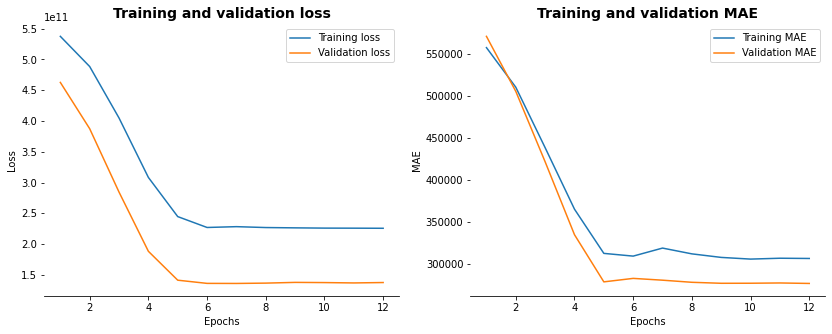

In [41]:
plot_history(resnet_model_history)

In [61]:
resnet_model.evaluate(Xlearn, ylearn)
resnet_model.evaluate(Xval, yval)
resnet_model.evaluate(Xtest, ytest)

4/4 [==============================] - 1s 299ms/step - loss: 453712510976.0000 - mae: 383843.2500


[453712510976.0, 383843.25]

# Fitting each photo separately using Inceptionv3

In [63]:
bathroom_learn = (Xlearn[:,0:128, 0:128, :])
bedroom_learn = (Xlearn[:,0:128, 128:256, :])
frontal_learn = (Xlearn[:,128:256, 0:128, :])
kitchen_learn = (Xlearn[:,128:256, 128:256, :])

bathroom_val = (Xval[:,0:128, 0:128, :])
bedroom_val = (Xval[:,0:128, 128:256, :])
frontal_val = (Xval[:,128:256, 0:128, :])
kitchen_vl = (Xval[:,128:256, 128:256, :])

bathroom_test = (Xtest[:,0:128, 0:128, :])
bedroom_test = (Xtest[:,0:128, 128:256, :])
frontal_test = (Xtest[:,128:256, 0:128, :])
kitchen_test = (Xtest[:,128:256, 128:256, :])

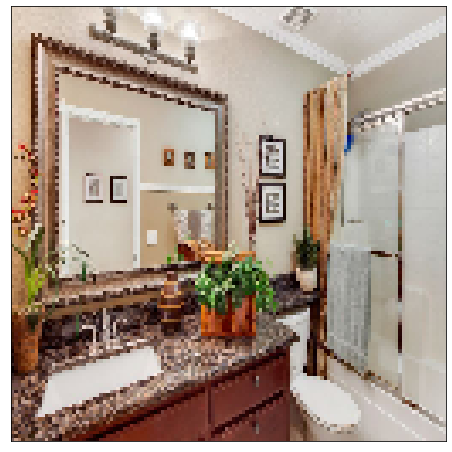

In [64]:
plt.figure(figsize = (8, 8))
plt.imshow(bathroom_learn[0, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()

In [67]:
bathroom_input = keras.Input(shape=(bathroom_learn.shape[1], 
                            bathroom_learn.shape[2],
                            bathroom_learn.shape[3]),
                            name="bathroom")
x1 = keras.applications.inception_v3.preprocess_input(bathroom_input)
x1 = conv_base3(x1)
x1 = layers.Flatten()(x1)

bedroom_input = keras.Input(shape=(bedroom_learn.shape[1], 
                            bedroom_learn.shape[2],
                            bedroom_learn.shape[3]),
                            name="bedroom")
x2 = keras.applications.inception_v3.preprocess_input(bedroom_input)
x2 = conv_base3(x2)
x2 = layers.Flatten()(x2)


frontal_input = keras.Input(shape=(frontal_learn.shape[1], 
                            frontal_learn.shape[2],
                            frontal_learn.shape[3]),
                            name="frontal")
x3 = keras.applications.inception_v3.preprocess_input(frontal_input)
x3 = conv_base3(x3)
x3 = layers.Flatten()(x3)

kitchen_input = keras.Input(shape=(kitchen_learn.shape[1], 
                            kitchen_learn.shape[2],
                            kitchen_learn.shape[3]),
                            name="kitchen")
x4 = keras.applications.inception_v3.preprocess_input(kitchen_input)
x4 = conv_base3(x4)
x4 = layers.Flatten()(x4)


# Merge all available features into a single large vector via concatenation
x = layers.concatenate([x1, x2, x3, x4])
x = layers.Dense(256)(x)
outputs = layers.Dense(1)(x)
separate_model = keras.Model(inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=outputs)

# Model compiling
separate_model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate= learning_rate), metrics=["mae"])


# Fitting the model
history = separate_model.fit({"bathroom": bathroom_learn,
                              "bedroom": bedroom_learn,
                              "frontal": frontal_learn,
                              "kitchen": kitchen_learn},
                             ylearn,
                             epochs= 40,
                             validation_split=0.2,
                             verbose=1,
                             callbacks= early_stop)

Epoch 1/40
9/9 [==============================] - 23s 974ms/step - loss: 517479956480.0000 - mae: 556019.8125 - val_loss: 669005381632.0000 - val_mae: 606457.1250
Epoch 2/40
9/9 [==============================] - 2s 175ms/step - loss: 510815240192.0000 - mae: 549983.1875 - val_loss: 659570491392.0000 - val_mae: 598565.6875
Epoch 3/40
9/9 [==============================] - 2s 176ms/step - loss: 500422639616.0000 - mae: 540654.5625 - val_loss: 645898764288.0000 - val_mae: 586940.5625
Epoch 4/40
9/9 [==============================] - 2s 176ms/step - loss: 485998460928.0000 - mae: 527319.2500 - val_loss: 627508772864.0000 - val_mae: 570925.6875
Epoch 5/40
9/9 [==============================] - 2s 177ms/step - loss: 467486244864.0000 - mae: 509412.0312 - val_loss: 604237791232.0000 - val_mae: 550207.5625
Epoch 6/40
9/9 [==============================] - 2s 179ms/step - loss: 445020995584.0000 - mae: 486893.2188 - val_loss: 576478183424.0000 - val_mae: 526603.8125
Epoch 7/40
9/9 [===========

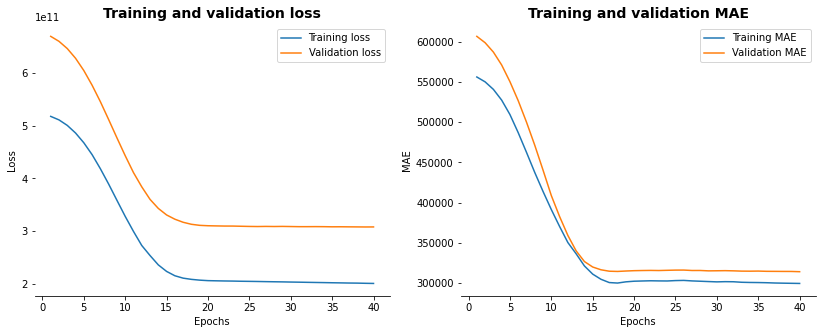

In [68]:
plot_history(history)

In [70]:
separate_model.evaluate([bathroom_learn, bedroom_learn, frontal_learn, kitchen_learn], ylearn)
separate_model.evaluate([bathroom_val, bedroom_val, frontal_val, kitchen_vl], yval)
separate_model.evaluate([bathroom_test, bedroom_test, frontal_test, kitchen_test], ytest)

4/4 [==============================] - 1s 333ms/step - loss: 453149786112.0000 - mae: 372200.1875


[453149786112.0, 372200.1875]

**We couldn't reach the target error this may be due to the system being inherently stochastic or the fact that the input characteristics may not contain all of the information necessary to fully understand the output variable. And having a limited training data also placed restrictions on the models performance.**

**Although using pre-defined models was considerably simpler, in general we obtained similar results using my model created from scratch, defined models with integrated images, and predefined models with individual images.**